## Predicting Insurance Premiums

In [11]:
#Initial imports
import pandas as pd
from path import Path
import tensorflow as tf
import hvplot.pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

In [13]:
#Read in the insurance premium data
file_path = Path("./Resources/Updated_Project_Data.csv")
InsuranceData_df = pd.read_csv(file_path)
InsuranceData_df = InsuranceData_df.dropna()


### PCA Weight the Features

In [14]:
#Get the Encoded Data from the original dataframe
InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)
feature_data_df = InsuranceData_df_encoded.drop(columns=['Yearly Premium'])
feature_data_df.head()

,DOT,ISS,Years_In_Business,Number Of Trucks,Legal_Name_100 K LOGISTICS CORP,Legal_Name_123 MOVING SOLUTIONS INC,Legal_Name_14 TRANSPORT CORP,Legal_Name_1RCM & ASSOCIATES LLC,Legal_Name_1ST COAST CARGO INC,Legal_Name_1ST RESPONSE ROADSIDE LLC,Legal_Name_2 BROTHERS DDR CORP,Legal_Name_238 TRANSPORT INC,Legal_Name_24 7 MARTINEZ EXPRESS INC,Legal_Name_24K TRUCKING INC,Legal_Name_251 LOGISTICS LLC,Legal_Name_29 TRANSPORT INC,Legal_Name_2MM LINES CORP,Legal_Name_2RV GLOBAL LLC,Legal_Name_3 KINGZ TRANSPORTATION LLC,Legal_Name_305 AUTO EXPRESS CORP,Legal_Name_3D TRANSPORT LLC,Legal_Name_3DNOA TRUCKING SERV LLC,Legal_Name_3M TRUCKING LLC,Legal_Name_4 EVA TRUCKING LLC,Legal_Name_50 STATE CARGO INC,Legal_Name_7 WAY DELIVERY CORP,Legal_Name_786 TRANSPORT LLC,Legal_Name_8 BROTHERS INC,Legal_Name_81 FREIGHT SOLUTIONS CORP,Legal_Name_95 XPRESS LINE CORP,Legal_Name_A & C TRANSPORT LINES INC,Legal_Name_A & G EXPRESS TRUCKING INC,Legal_Name_A & H TOWING SERVICE INC,Legal_Name_A & H TRANSPORT INC,Legal_Name_A & M EXPRESS TRUCKING LLC,Legal_Name_A & N TRANSPORTATION CORP,Legal_Name_A & S AUTO TRANSPORT LLC,Legal_Name_A & Y CARGO CORP,Legal_Name_A B E EXPRESS CORP,Legal_Name_A CANDIES COACHWORKS INC,...,business_county_OKALOOSA,business_county_OKEECHOBEE,business_county_ORANGE,business_county_OSCEOLA,business_county_PALM BEACH,business_county_PASCO,business_county_PASSAIC,business_county_PIERCE,business_county_PINAL,business_county_PINELLAS,business_county_POLK,business_county_PUTNAM,business_county_RIVERSIDE,business_county_SAINT JOHNS,business_county_SAINT LOUIS,business_county_SAINT LUCIE,business_county_SANTA ROSA,business_county_SARASOTA,business_county_SEMINOLE,business_county_SHEBOYGAN,business_county_SUMTER,business_county_SUSSEX,business_county_SUWANNEE,business_county_SWEETWATER,business_county_TANEY,business_county_TARRANT,business_county_UNION,business_county_VIRGINIA BEACH CITY,business_county_VOLUSIA,business_county_WAKE,business_county_WAKULLA,business_county_WASCO,business_county_WASHINGTON,business_county_WAYNE,business_county_WEBB,business_county_WILLIAMSON,business_county_WYANDOTTE,business_county_YORK,County _High Risk,County _Normal
0,3490777.0,100.0,1.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3583145.0,100.0,1.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3259601.0,100.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,872185.0,100.0,22.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3238348.0,100.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
# set the PCA instance and declare the number of PCA variables
pca=PCA(n_components=10)

In [16]:
# fit the PCA model on the transformed InsuranceData Dataframe
insurance_pca = pca.fit_transform(feature_data_df)

# reveiw the first 5 rows of the array of the features
insurance_pca[:5]

array([[-8.30623351e+05,  4.52605800e+01,  5.88577422e+01,
         4.27237597e-01, -5.47028106e-01, -5.51169897e-02,
        -2.93487134e-02, -5.41021538e-02,  8.24491208e-02,
         1.51056533e-01],
       [-9.22991351e+05,  5.46442890e+01,  5.87996606e+01,
         1.20864936e+00, -5.46392207e-01, -5.68931372e-02,
        -3.10667474e-02, -5.25697842e-02,  9.73375776e-02,
         1.87773827e-01],
       [-5.99447353e+05,  1.87788479e+01,  5.90309765e+01,
         4.72672309e-01, -5.22600948e-01, -5.02634253e-02,
        -2.22271583e-02, -4.05134179e-02,  7.99752934e-02,
         1.38661221e-01],
       [ 1.78796864e+06, -2.24727530e+02,  6.05260426e+01,
        -7.74430678e-01, -3.52690751e-01, -4.30922654e-02,
         1.01460049e-02,  2.89957489e-02,  9.07974037e-02,
         1.54435095e-01],
       [-5.78194353e+05,  1.36199420e+01,  5.90772362e+01,
         2.66879231e-01,  1.19200519e+00, -8.52327536e-03,
         1.10154591e-02, -2.04793449e-02,  2.68295817e-02,
         1.

In [17]:
# Calculate the PCA explained variance ratio....this will determin if you have enough components to accurately explain the dataframe
# the higher the sum of the number the better...it will explain x% of the total variance of the dataframe condensed into the PCA variables
pca.explained_variance_ratio_

array([9.99999820e-01, 1.79134299e-07, 8.92278381e-10, 5.18261476e-12,
       5.84061102e-13, 9.19048616e-14, 8.10615989e-14, 7.45322031e-14,
       6.67918331e-14, 5.20633201e-14])

In [18]:
# Create the PCA Dataframe
insurance_pca_df = pd.DataFrame(
    insurance_pca
)

# Review the PCA DataFrame
insurance_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-8.306234e+05,45.260580,58.857742,0.427238,-0.547028,-0.055117,-0.029349,-0.054102,0.082449,0.151057
1,-9.229914e+05,54.644289,58.799661,1.208649,-0.546392,-0.056893,-0.031067,-0.052570,0.097338,0.187774
2,-5.994474e+05,18.778848,59.030977,0.472672,-0.522601,-0.050263,-0.022227,-0.040513,0.079975,0.138661
3,1.787969e+06,-224.727530,60.526043,-0.774431,-0.352691,-0.043092,0.010146,0.028996,0.090797,0.154435
4,-5.781944e+05,13.619942,59.077236,0.266879,1.192005,-0.008523,0.011015,-0.020479,0.026830,0.014760


In [19]:
# Define the features data...aka the insurance premium feature inputs
# right now I am just setting up the framework for the data inputs...for our project the X data will be all values other than the insurance premium

#InsuranceData_df = InsuranceData_df[['County ','ISS', 'Years_In_Business', 'Number Of Trucks ', 'Yearly Premium']]
#InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)
#X = InsuranceData_df_encoded.drop(columns=['Yearly Premium', 'County _High Risk'])
X = insurance_pca_df


In [20]:
# Define the target Data....aka the insurance premium
# right now I am just setting up the framework for the data inputs...for our project the y data will be the insurance premium
y = InsuranceData_df_encoded['Yearly Premium'].values

### Scale the Data for the Neural Network Model

In [21]:
# Create the scaler instance and fit scaler with features data
scaler = StandardScaler().fit(X)
# Scale the features data
X = scaler.transform(X)





In [22]:
# Create a shallow, 1 hidden layer, neural network
neural_n = Sequential()

# Hidden layer
neural_n.add(Dense(units=30, input_dim=10, activation="relu"))

# Output layer
neural_n.add(Dense(units=1, activation="linear"))

In [23]:
# Compile the model
neural_n.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_1 = neural_n.fit(X, y, validation_split=0.3, epochs=1000, verbose=0)

In [24]:
# Define the model - deep neural network with two layers
nn_2 = Sequential()

# First hidden layer
nn_2.add(Dense(units=30, input_dim=10, activation="relu"))

# Second hidden layer
nn_2.add(Dense(units=20, activation="relu"))

# Output layer
nn_2.add(Dense(units=1, activation="linear"))

In [25]:
# Compile the model
nn_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn_2.fit(X, y, validation_split=0.3, epochs=1000, verbose=0)

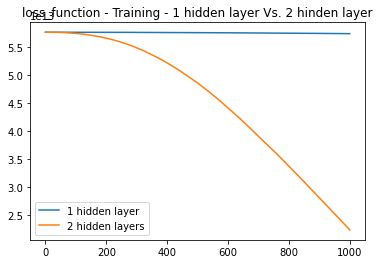

In [26]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

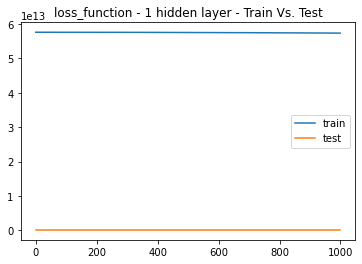

In [27]:
# Plot train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

In [28]:
# Adding the Predictions onto the Original Datafram
InsuranceData_df['Predictions1'] = neural_n.predict(X)
InsuranceData_df['Predictions2'] = nn_2.predict(X)




61/61 [==============================] - 0s 692us/step


In [29]:
InsuranceData_df.head()

,DOT,Legal_Name,Business_State,business_county,County,ISS,Years_In_Business,Number Of Trucks,Yearly Premium,Predictions1,Predictions2
0,3490777.0,DJS EXPRESS TRANSPORT LLC,FL,SEMINOLE,Normal,100.0,1.0,8.0,122500,7034.338867,2.087594e+03
1,3583145.0,HERSEY ENTERPRISES LLC,FL,SAINT JOHNS,Normal,100.0,1.0,8.0,122500,5401.496094,2.087594e+03
2,3259601.0,TRANSPORT LOGISTICS EXPRESS CORP,FL,COLUMBIA,Normal,100.0,3.0,5.0,87500,9089.982422,2.087594e+03
3,872185.0,CT&T TRANSPORT INC,FL,SEMINOLE,Normal,100.0,22.0,4.0,68500,34715.664062,2.342410e+06
4,3238348.0,PINE LOGICS LLC,FL,MIAMI-DADE,High Risk,100.0,3.0,2.0,39000,8546.380859,2.087594e+03


## Neural Network Using PyTorch

In [30]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F

In [31]:
# Define the features data...aka the insurance premium feature inputs
# right now I am just setting up the framework for the data inputs...for our project the X data will be all values other than the insurance premium
InsuranceData_df = InsuranceData_df[['County ','ISS', 'Years_In_Business', 'Number Of Trucks ', 'Yearly Premium']]
InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)

In [32]:
# create the input arrays for inputs an the target data
inputs_array = InsuranceData_df_encoded.drop(columns='Yearly Premium')
inputs_array = inputs_array.to_numpy()
targets_array = InsuranceData_df['Yearly Premium'].to_numpy()
inputs_array, targets_array
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)
inputs.dtype, targets.dtype
dataset = TensorDataset(inputs, targets)

In [33]:
# create the % training and test data
val_percent = 0.15
val_size = int(inputs_array.shape[0] * val_percent)
train_size = inputs_array.shape[0] - val_size

In [34]:
# Use the random_split function to split dataset into 2 parts of the desired length
train_ds, val_ds = random_split(dataset,[train_size,val_size]) 

In [35]:
# create data loaders for training & validation
batch_size = 10
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [36]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[41.,  1.,  1.,  0.,  1.],
        [79.,  5.,  1.,  1.,  0.],
        [ 1.,  1.,  1.,  0.,  1.],
        [42.,  1.,  1.,  1.,  0.],
        [ 1.,  5.,  1.,  0.,  1.],
        [ 1.,  4.,  8.,  0.,  1.],
        [29.,  3.,  1.,  1.,  0.],
        [38.,  0.,  1.,  0.,  1.],
        [39.,  1.,  1.,  0.,  1.],
        [ 1., 16.,  3.,  0.,  1.]])
targets: tensor([ 15000.,  22000.,  15000.,  17500.,  15000., 118000.,  17500.,  15000.,
         15000.,  47000.])


In [37]:
# Creating the input and output sizes for the Linear Regression Model
input_size = InsuranceData_df_encoded.drop(columns='Yearly Premium').shape[1]
output_size = InsuranceData_df_encoded.shape[1] - input_size


In [38]:
# Insurance Model Function
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        #loss = F.mse_loss(out, targets)                          # fill this
        loss = F.l1_loss(out, targets) 
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
       # loss = F.mse_loss(out, targets)                           # fill this
        loss = F.l1_loss(out, targets) 
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [39]:
model = InsuranceModel()

In [40]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2318, -0.0057, -0.0377, -0.1650,  0.0604]], requires_grad=True),
 Parameter containing:
 tensor([0.4378], requires_grad=True)]

In [41]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [42]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 516643.25}


c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [43]:
epochs = 1000
lr = 1
history1 = fit(epochs, lr, model, train_loader, val_loader)

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 499361.6875
Epoch [40], val_loss: 498616.3750
Epoch [60], val_loss: 498131.9688
Epoch [80], val_loss: 497783.2812
Epoch [100], val_loss: 497604.6875


In [44]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 497606.1875
Epoch [40], val_loss: 497606.7812
Epoch [60], val_loss: 497608.0312
Epoch [80], val_loss: 497609.0938
Epoch [100], val_loss: 497609.5312


In [45]:
epochs = 1000
lr = 1e-2
history3 = fit(epochs, lr, model, train_loader, val_loader)

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 497612.0312
Epoch [40], val_loss: 497611.7500
Epoch [60], val_loss: 497610.7812
Epoch [80], val_loss: 497607.0938
Epoch [100], val_loss: 497607.3125


In [46]:
val_loss = evaluate(model, val_loader)
val_loss

c:\Users\15613\Anaconda3\envs\dev\envs\MachineEnv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


{'val_loss': 497607.3125}

In [48]:
# Grab a single data point to see what the target and predictions are
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)              # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    return prediction

In [49]:
# testing one data point to see how the model did
input, target = val_ds[0]
predict_single(input, target, model)


Input: tensor([42.,  3.,  1.,  0.,  1.])
Target: tensor(15000.)
Prediction: tensor(28654.7148)


tensor(28654.7148)

In [50]:
# testing another data point to see how the model did
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([96.,  7., 43.,  0.,  1.])
Target: tensor(645500.)
Prediction: tensor(44326.)


tensor(44326.)

In [51]:
# grabbing the full tensor of predictions
def predict_full(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)              
    prediction = predictions.detach()
    #print("Input:", input)
    #print("Target:", target)
    #print("Prediction:", prediction)
    return prediction

In [58]:
# Add back the predicted Data to the original InsuranceData_df to compare and manipulate
full_prediction = predict_full(inputs, targets, model)
prediction_data = torch.reshape(full_prediction, (-1,))
InsuranceData_df['Prediction'] = prediction_data
InsuranceData_df


Target: tensor([122500., 122500.,  87500.,  ...,  15000.,  15000.,  86000.])
Prediction: tensor([[41336.3438],
        [41336.3438],
        [42714.8203],
        ...,
        [16654.6094],
        [16654.6094],
        [38499.4609]])


,Actual,Prediction
0,122500.0,41336.343750
1,122500.0,41336.343750
2,87500.0,42714.820312
3,68500.0,55700.992188
4,39000.0,41607.367188
...,...,...
1933,17500.0,16901.765625
1934,15000.0,17337.882812
1935,15000.0,16654.609375
1936,15000.0,16654.609375


In [53]:
target_data = targets.numpy()
prediction_df = pd.DataFrame({
    "Actual": target_data,
    "Prediction" : prediction_data
})
prediction_df

(1938,)